In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("g:\\VSCODE\\MovieLensData\\Social_media_analytics\\Req\\u.data", sep='\t', names=["user id", "movie id", "rating", "timestamp"])

In [3]:
df.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
dfgenre = pd.read_csv("g:\\VSCODE\\MovieLensData\\Social_media_analytics\\Req\\u.genre")

In [5]:
dfgenre

,unknown|0
0,Action|1
1,Adventure|2
2,Animation|3
3,Children's|4
4,Comedy|5
5,Crime|6
6,Documentary|7
7,Drama|8
8,Fantasy|9
9,Film-Noir|10


In [6]:
column_names = [
    "movie id", "movie title", "release date", "video release date",
    "IMDb URL", "unknown", "Action", "Adventure", "Animation",
    "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy",
    "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi",
    "Thriller", "War", "Western"
]

In [7]:
dfitems = pd.read_csv("g:\\VSCODE\\MovieLensData\\Social_media_analytics\\Req\\u.item", sep='|', names=column_names, encoding='latin-1')

In [8]:
movie_titles = dfitems['movie title'].tolist()

In [9]:
cleaned_titles = [title.rsplit(' (', 1)[0] for title in movie_titles]

# Print the cleaned titles
print(cleaned_titles)

['Toy Story', 'GoldenEye', 'Four Rooms', 'Get Shorty', 'Copycat', 'Shanghai Triad (Yao a yao yao dao waipo qiao)', 'Twelve Monkeys', 'Babe', 'Dead Man Walking', 'Richard III', 'Seven (Se7en)', 'Usual Suspects, The', 'Mighty Aphrodite', 'Postino, Il', "Mr. Holland's Opus", 'French Twist (Gazon maudit)', 'From Dusk Till Dawn', 'White Balloon, The', "Antonia's Line", 'Angels and Insects', 'Muppet Treasure Island', 'Braveheart', 'Taxi Driver', 'Rumble in the Bronx', 'Birdcage, The', 'Brothers McMullen, The', 'Bad Boys', 'Apollo 13', 'Batman Forever', 'Belle de jour', 'Crimson Tide', 'Crumb', 'Desperado', 'Doom Generation, The', 'Free Willy 2: The Adventure Home', 'Mad Love', 'Nadja', 'Net, The', 'Strange Days', 'To Wong Foo, Thanks for Everything! Julie Newmar', 'Billy Madison', 'Clerks', 'Disclosure', 'Dolores Claiborne', 'Eat Drink Man Woman', 'Exotica', 'Ed Wood', 'Hoop Dreams', 'I.Q.', 'Star Wars', 'Legends of the Fall', 'Madness of King George, The', 'Natural Born Killers', 'Outbreak'

In [10]:
dfitems.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
df_movies = dfitems[['movie id','movie title']]
df_movies.head()

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [12]:
df_merged = pd.merge(df, df_movies, how='inner', on='movie id')
df_merged.head()

,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [13]:
df_merged.head()

,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [14]:
movie_user_counts = df_merged.groupby(['movie title', 'user id']).size().reset_index(name='count')
movie_user_counts_sorted = movie_user_counts.sort_values('count', ascending=False)

movie_user_counts_sorted

,movie title,user id,count
16556,Chasing Amy (1997),268,2
16557,Chasing Amy (1997),269,2
11802,Body Snatchers (1993),524,2
11803,Body Snatchers (1993),537,2
44856,"Ice Storm, The (1997)",354,2
...,...,...,...
99672,"Young Poisoner's Handbook, The (1995)",861,1
99673,"Young Poisoner's Handbook, The (1995)",865,1
99674,"Young Poisoner's Handbook, The (1995)",868,1
99675,"Young Poisoner's Handbook, The (1995)",871,1


In [15]:
df_merged[(df_merged['movie title'] == 'Body Snatchers (1993)') & (df_merged['user id'] == 833)]


,user id,movie id,rating,timestamp,movie title
66833,833,670,1,875124428,Body Snatchers (1993)
68445,833,573,1,875223976,Body Snatchers (1993)


In [16]:

refined_dataset = df_merged.groupby(by=['user id','movie title'], as_index=False).agg({"rating":"mean"})

refined_dataset.head()

,user id,movie title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0


In [17]:

num_users = len(refined_dataset['user id'].value_counts())
num_items = len(refined_dataset['movie title'].value_counts())
print('Unique number of users in the dataset: {}'.format(num_users))
print('Unique number of movies in the dataset: {}'.format(num_items))

Unique number of users in the dataset: 943
Unique number of movies in the dataset: 1664


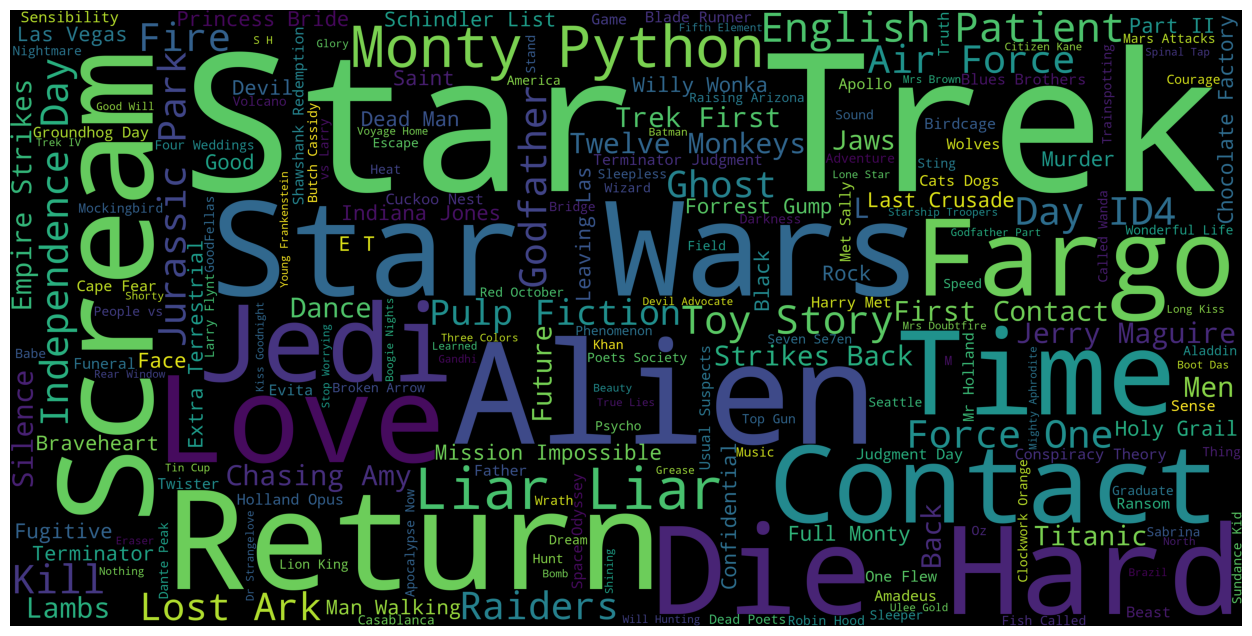

In [18]:
# Import new libraries
%matplotlib inline
import matplotlib.pyplot as plt

import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
df_merged['movie title'] = df_merged['movie title'].fillna("").astype('str')
title_corpus = ' '.join(df_merged['movie title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

C:\Users\gurut\AppData\Local\Temp\ipykernel_11180\4278949494.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merged['rating'].fillna(df_merged['rating'].median()))


<Axes: xlabel='rating', ylabel='Density'>

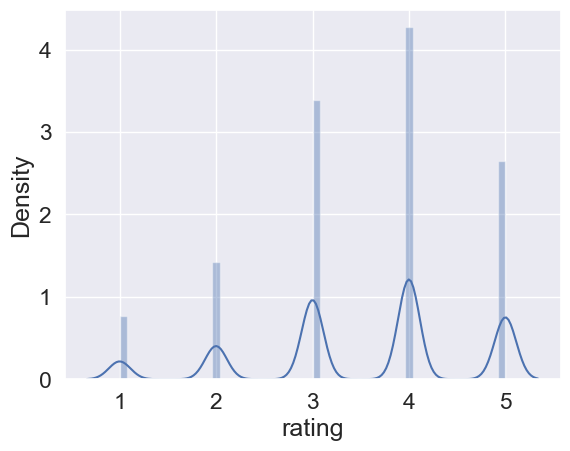

In [19]:
# Import seaborn library
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# Display distribution of rating
sns.distplot(df_merged['rating'].fillna(df_merged['rating'].median()))

Collaborative Filtering



The Collaborative Filtering Recommender is entirely based on the past behavior and not on the context. More specifically, it is based on the similarity in preferences, tastes and choices of two users. It analyses how similar the tastes of one user is to another and makes recommendations on the basis of that.

For instance, if user A likes movies 1, 2, 3 and user B likes movies 2,3,4, then they have similar interests and A should like movie 4 and B should like movie 1. This makes it one of the most commonly used algorithm as it is not dependent on any additional information.

In general, collaborative filtering is the workhorse of recommender engines. The algorithm has a very interesting property of being able to do feature learning on its own, which means that it can start to learn for itself what features to use. It can be divided into Memory-Based Collaborative Filtering and Model-Based Collaborative filtering. In this post, I'll only focus on the Memory-Based Collaborative Filtering technique.

In [20]:
# Fill NaN values in user_id and movie_id column with 0
df_merged['user id'] = df_merged['user id'].fillna(0)
df_merged['movie id'] = df_merged['movie id'].fillna(0)

# Replace NaN values in rating column with average of all values
df_merged['rating'] = df_merged['rating'].fillna(df_merged['rating'].mean())

In [21]:
# Randomly sample 5% of the ratings dataset
small_data = df_merged.sample(frac=0.05)
# Check the sample info
print(small_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 32313 to 16232
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user id      5000 non-null   int64 
 1   movie id     5000 non-null   int64 
 2   rating       5000 non-null   int64 
 3   timestamp    5000 non-null   int64 
 4   movie title  5000 non-null   object
dtypes: int64(4), object(1)
memory usage: 234.4+ KB
None


In [22]:
small_data.columns

Index(['user id', 'movie id', 'rating', 'timestamp', 'movie title'], dtype='object')

In [23]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data, test_data = train_test_split(small_data, test_size=0.2)

In [24]:
# Create user-item matrices for training and testing
train_data_matrix = train_data[['user id', 'movie id', 'rating']].to_numpy()
test_data_matrix = test_data[['user id', 'movie id', 'rating']].to_numpy()

# Check their shape
print(train_data_matrix.shape)
print(test_data_matrix.shape)

(4000, 3)
(1000, 3)


In [25]:
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(train_data_matrix, metric='correlation')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation[:4, :4])

[[1.         0.27370946 0.51586585 0.96200634]
 [0.27370946 1.         0.96515261 0.52591112]
 [0.51586585 0.96515261 1.         0.73016019]
 [0.96200634 0.52591112 0.73016019 1.        ]]


In [26]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances

# Ensure train_data_matrix is clean and handle NaN values
train_data_matrix = np.nan_to_num(train_data_matrix)  # Replace NaNs with 0

# Compute Item Similarity Matrix using correlation metric
item_correlation = 1 - pairwise_distances(train_data_matrix.T, metric='correlation')

# Replace any remaining NaN values in the similarity matrix with 0
item_correlation[np.isnan(item_correlation)] = 0

# Print a portion of the similarity matrix for verification
print(item_correlation[:4, :4])

[[ 1.00000000e+00 -3.34007524e-02 -1.08758885e-04]
 [-3.34007524e-02  1.00000000e+00 -1.85071023e-01]
 [-1.08758885e-04 -1.85071023e-01  1.00000000e+00]]


In [27]:
# Function to predict ratings
def predict(ratings, similarity, type='user'):
    if type == 'user':
        # Compute mean rating for each user
        mean_user_rating = ratings.mean(axis=1)
        # Center ratings by subtracting the mean rating
        ratings_diff = ratings - mean_user_rating[:, np.newaxis]  # np.newaxis ensures proper broadcasting
        # Predict ratings based on user similarity
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        # Predict ratings based on item similarity
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    else:
        raise ValueError("Invalid type. Choose 'user' or 'item'.")
    return pred

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE
def rmse(pred, actual):
    # Extract nonzero elements (ignoring missing ratings)
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    # Compute RMSE
    return sqrt(mean_squared_error(pred, actual))

In [29]:
# Predict ratings on the training data with both similarity score
user_prediction = predict(train_data_matrix, user_correlation, type='user')
item_prediction = predict(train_data_matrix, item_correlation, type='item')

# RMSE on the test data
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 294.86630534072793
Item-based CF RMSE: 334.0392985474136


In [30]:
# RMSE on the train data
print('User-based CF RMSE: ' + str(rmse(user_prediction, train_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, train_data_matrix)))

User-based CF RMSE: 137.8619608134004
Item-based CF RMSE: 79.09421136429879


In [31]:
train_data_matrix = np.nan_to_num(train_data_matrix, nan=0)
test_data_matrix = np.nan_to_num(test_data_matrix, nan=0)

In [32]:
# Matrix Factorization using SVD
def matrix_factorization_svd(ratings, k):
    """
    Perform matrix factorization using Singular Value Decomposition (SVD).
    
    Parameters:
    - ratings: User-Item matrix (numpy array) with ratings.
    - k: Number of latent factors to retain.
    
    Returns:
    - predicted_ratings: Predicted ratings matrix after reconstruction.
    """
    # Step 1: Perform Singular Value Decomposition
    U, sigma, Vt = np.linalg.svd(ratings, full_matrices=False)
    
    # Step 2: Retain only the top-k singular values
    sigma_k = np.diag(sigma[:k])  # Convert top-k singular values into a diagonal matrix
    U_k = U[:, :k]               # Top-k left singular vectors
    Vt_k = Vt[:k, :]             # Top-k right singular vectors
    
    # Step 3: Reconstruct the ratings matrix with reduced dimensions
    predicted_ratings = np.dot(np.dot(U_k, sigma_k), Vt_k)
    
    return predicted_ratings

In [33]:
# Number of latent factors to retain
k = 7
    
# Perform SVD-based Matrix Factorization
predicted_ratings = matrix_factorization_svd(train_data_matrix, k)

# Calculate RMSE on test data
error = rmse(predicted_ratings, test_data_matrix)

print("Predicted Ratings Matrix:")
print(predicted_ratings)

print(f"RMSE on Test Data: {error}")

Predicted Ratings Matrix:
[[470. 118.   4.]
 [216. 402.   2.]
 [486. 628.   3.]
 ...
 [693. 191.   2.]
 [ 16. 164.   5.]
 [524. 606.   4.]]
RMSE on Test Data: 344.93397339201033


In [34]:
def rmse(pred, actual):
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

In [35]:
from numpy.random import normal

# Probabilistic Matrix Factorization (PMF) Implementation
def pmf(train_data_matrix, num_users, num_items, latent_features, learning_rate, reg_param, epochs):
    """
    Perform Probabilistic Matrix Factorization (PMF).

    Parameters:
    - train_data_matrix: User-Item matrix with ratings.
    - num_users: Number of users.
    - num_items: Number of items.
    - latent_features: Number of latent features.
    - learning_rate: Learning rate for gradient descent.
    - reg_param: Regularization parameter.
    - epochs: Number of iterations.

    Returns:
    - user_features: User latent feature matrix.
    - item_features: Item latent feature matrix.
    - predicted_ratings: Predicted ratings matrix.
    """
    # Initialize user and item latent feature matrices
    user_features = normal(scale=1./latent_features, size=(num_users, latent_features))
    item_features = normal(scale=1./latent_features, size=(num_items, latent_features))

    # Training process
    for epoch in range(epochs):
        for i in range(num_users):
            for j in range(num_items):
                if train_data_matrix[i, j] > 0:  # Only consider non-zero ratings
                    error = train_data_matrix[i, j] - np.dot(user_features[i, :], item_features[j, :].T)
                    # Update user and item latent features
                    user_features[i, :] += learning_rate * (error * item_features[j, :] - reg_param * user_features[i, :])
                    item_features[j, :] += learning_rate * (error * user_features[i, :] - reg_param * item_features[j, :])

        # Optional: Print loss at each epoch for debugging
        if epoch % 10 == 0:
            loss = 0
            for i in range(num_users):
                for j in range(num_items):
                    if train_data_matrix[i, j] > 0:
                        loss += (train_data_matrix[i, j] - np.dot(user_features[i, :], item_features[j, :].T))**2
                        loss += reg_param * (np.linalg.norm(user_features[i, :]) + np.linalg.norm(item_features[j, :]))
            print(f"Epoch {epoch}, Loss: {loss}")

    # Compute predicted ratings
    predicted_ratings = np.dot(user_features, item_features.T)
    
    return user_features, item_features, predicted_ratings

In [36]:
num_users, num_items = train_data_matrix.shape
latent_features = 2      # Number of latent factors
learning_rate = 0.01     # Learning rate for gradient descent
reg_param = 0.1          # Regularization parameter to prevent overfitting
epochs = 100             # Number of training iterations

# Perform PMF
user_features_pmf, item_features_pmf, predicted_ratings_pmf = pmf(
    train_data_matrix,
    num_users,
    num_items,
    latent_features,
    learning_rate,
    reg_param,
    epochs
)

nan_in_predicted = np.isnan(predicted_ratings_pmf).sum()
nan_in_test = np.isnan(test_data_matrix).sum()
print(f"NaN in predicted ratings: {nan_in_predicted}")
print(f"NaN in test data: {nan_in_test}")

# Handle NaN values by replacing them with 0
predicted_ratings_pmf = np.nan_to_num(predicted_ratings_pmf, nan=0)

# Verify that NaN values are handled
nan_in_predicted_after = np.isnan(predicted_ratings_pmf).sum()
print(f"NaN in predicted ratings after handling: {nan_in_predicted_after}")

# Calculate RMSE
pmf_rmse_value = rmse(predicted_ratings_pmf, test_data_matrix)
print(f"PMF RMSE on Test Data: {pmf_rmse_value}")

C:\Users\gurut\AppData\Local\Temp\ipykernel_11180\4118662832.py:33: RuntimeWarning: overflow encountered in multiply
  user_features[i, :] += learning_rate * (error * item_features[j, :] - reg_param * user_features[i, :])
C:\Users\gurut\AppData\Local\Temp\ipykernel_11180\4118662832.py:33: RuntimeWarning: invalid value encountered in add
  user_features[i, :] += learning_rate * (error * item_features[j, :] - reg_param * user_features[i, :])
C:\Users\gurut\AppData\Local\Temp\ipykernel_11180\4118662832.py:34: RuntimeWarning: invalid value encountered in subtract
  item_features[j, :] += learning_rate * (error * user_features[i, :] - reg_param * item_features[j, :])
C:\Users\gurut\AppData\Local\Temp\ipykernel_11180\4118662832.py:34: RuntimeWarning: overflow encountered in multiply
  item_features[j, :] += learning_rate * (error * user_features[i, :] - reg_param * item_features[j, :])


Epoch 0, Loss: nan
Epoch 10, Loss: nan
Epoch 20, Loss: nan
Epoch 30, Loss: nan
Epoch 40, Loss: nan
Epoch 50, Loss: nan
Epoch 60, Loss: nan
Epoch 70, Loss: nan
Epoch 80, Loss: nan
Epoch 90, Loss: nan
NaN in predicted ratings: 12000
NaN in test data: 0
NaN in predicted ratings after handling: 0
PMF RMSE on Test Data: 437.6896838324309


In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import numpy as np

# Step 1: Map user and item IDs to zero-based indices
def remap_ids(data):
    user_mapping = {old_id: new_id for new_id, old_id in enumerate(data['user id'].unique())}
    item_mapping = {old_id: new_id for new_id, old_id in enumerate(data['movie id'].unique())}
    
    data['user id'] = data['user id'].map(user_mapping)
    data['movie id'] = data['movie id'].map(item_mapping)
    
    return data, len(user_mapping), len(item_mapping)

In [38]:
# Step 2: Split the data into training and testing sets
train_data, test_data = train_test_split(small_data, test_size=0.2)

# Remap IDs for both train and test datasets
train_data, num_users, num_items = remap_ids(train_data)
test_data['user id'] = test_data['user id'].map({old: new for new, old in enumerate(train_data['user id'].unique())})
test_data['movie id'] = test_data['movie id'].map({old: new for new, old in enumerate(train_data['movie id'].unique())})

test_data.dropna(inplace=True)  # Drop rows with unmapped IDs

In [39]:
# Step 3: Create PyTorch Dataset class
class InteractionDataset(Dataset):
    def __init__(self, user_ids, item_ids, ratings):
        self.user_ids = torch.LongTensor(user_ids)
        self.item_ids = torch.LongTensor(item_ids)
        self.ratings = torch.FloatTensor(ratings)

    def __len__(self):
        return len(self.ratings)

    def __getitem__(self, idx):
        return self.user_ids[idx], self.item_ids[idx], self.ratings[idx]

# Prepare training and testing datasets
train_dataset = InteractionDataset(
    user_ids=train_data['user id'].values,
    item_ids=train_data['movie id'].values,
    ratings=train_data['rating'].values
)

test_dataset = InteractionDataset(
    user_ids=test_data['user id'].values,
    item_ids=test_data['movie id'].values,
    ratings=test_data['rating'].values
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [40]:
# Step 4: Define the Hybrid Recommender Model (same as before)
class HybridRecommender(nn.Module):
    def __init__(self, num_users, num_items, embedding_dim=50, hidden_dim=128):
        super(HybridRecommender, self).__init__()
        self.user_embedding = nn.Embedding(num_users, embedding_dim)
        self.item_embedding = nn.Embedding(num_items, embedding_dim)
        
        self.fc1 = nn.Linear(embedding_dim * 2, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.output = nn.Linear(hidden_dim // 2, 1)
        
        self.dropout = nn.Dropout(0.2)
        self.activation = nn.ReLU()

    def forward(self, user_ids, item_ids):
        user_embeds = self.user_embedding(user_ids)
        item_embeds = self.item_embedding(item_ids)
        x = torch.cat([user_embeds, item_embeds], dim=-1)
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.activation(self.fc2(x))
        x = self.dropout(x)
        return self.output(x).squeeze()

In [41]:
# Step 5: Initialize model and train
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = HybridRecommender(num_users=num_users, num_items=num_items).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_loader, criterion, optimizer, device, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for user_ids, item_ids, ratings in train_loader:
            user_ids = user_ids.to(device)
            item_ids = item_ids.to(device)
            ratings = ratings.to(device)

            optimizer.zero_grad()
            predictions = model(user_ids, item_ids)
            loss = criterion(predictions, ratings)
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader)}")

train_model(model=model,
            train_loader=train_loader,
            criterion=criterion,
            optimizer=optimizer,
            device=device,
            epochs=10)



Epoch 1/10, Loss: 3.287670088291168
Epoch 2/10, Loss: 1.3752459130287171
Epoch 3/10, Loss: 1.2362842450141907
Epoch 4/10, Loss: 1.1068643717765807
Epoch 5/10, Loss: 1.0408601932525634
Epoch 6/10, Loss: 0.9465625557899475
Epoch 7/10, Loss: 0.9068358066082001
Epoch 8/10, Loss: 0.84587566447258
Epoch 9/10, Loss: 0.8315066726207733
Epoch 10/10, Loss: 0.7575148365497589


In [42]:
def evaluate_model(model, test_loader, device):
    model.eval()
    predictions_list = []
    actual_list = []
    
    with torch.no_grad():
        for user_ids, movie_ids, ratings, metadata in test_loader:
            user_ids = user_ids.to(device)
            movie_ids = movie_ids.to(device)
            ratings = ratings.to(device)
            metadata = metadata.to(device)

            # Forward pass
            predictions = model(user_ids, movie_ids, metadata)
            
            # Ensure predictions and ratings are 1D tensors
            if predictions.dim() == 0:  # If scalar, convert to 1D tensor
                predictions = predictions.unsqueeze(0)
            if ratings.dim() == 0:  # If scalar, convert to 1D tensor
                ratings = ratings.unsqueeze(0)
            
            predictions_list.append(predictions.cpu())
            actual_list.append(ratings.cpu())

    # Concatenate all predictions and actual values
    predictions_list = torch.cat(predictions_list).numpy()
    actual_list = torch.cat(actual_list).numpy()

    # Calculate RMSE
    rmse_value = np.sqrt(((predictions_list - actual_list) ** 2).mean())
    return rmse_value




In [43]:
df_merged.head()

,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [44]:
movie_with_title = pd.read_csv('G:\\VSCODE\\MovieLensData\\Social_media_analytics\\Req\\movie_with_title.csv')

In [45]:
movie_with_title.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,full_url,movie_link
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,https://www.imdb.com/find/?q=Toy%20Story%20(1995),/title/tt0114709/?ref_=fn_all_ttl_1
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,1,0,0,https://www.imdb.com/find/?q=GoldenEye%20(1995),/title/tt0113189/?ref_=fn_all_ttl_1
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,https://www.imdb.com/find/?q=Four%20Rooms%20(1...,/title/tt0113101/?ref_=fn_all_ttl_1
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,https://www.imdb.com/find/?q=Get%20Shorty%20(1...,/title/tt0113161/?ref_=fn_all_ttl_1
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,1,0,0,https://www.imdb.com/find/?q=Copycat%20(1995),/title/tt0112722/?ref_=fn_all_ttl_1


In [46]:
reviews_s = pd.read_csv('G:\\VSCODE\\MovieLensData\\Social_media_analytics\\Req\\reviews_with_sentiment_score.csv')

In [47]:
reviews_s.head()

,movie_id,review,cleaned_review,sentiment_score
0,tt0114709,I am a big fan of the animated movies coming f...,big fan animated movie coming pixar studio . a...,0.150000
1,tt0114709,"Y'know, I always suspected that my toys were c...","y'know , always suspected toy coming life n't ...",0.136364
2,tt0114709,Though I am not a big fan of computer animatio...,"though big fan computer animation , give folk ...",0.000000
3,tt0114709,Andy's toys live a reasonable life of fun and ...,"andy 's toy live reasonable life fun peace , w...",0.242803
4,tt0114709,This is a very clever animated story that was ...,"clever animated story big hit , justifiably . ...",0.233333


In [48]:
average_sentiment = reviews_s.groupby("movie_id")["sentiment_score"].mean().reset_index()

# Rename the column for clarity
average_sentiment.rename(columns={"sentiment_score": "average_sentiment_score"}, inplace=True)

# Display the result
print(average_sentiment)

        movie_id  average_sentiment_score
0      tt0013442                 0.172952
1      tt0017350                 0.328056
2      tt0020697                -0.006908
3      tt0022100                 0.067097
4      tt0022879                 0.183667
...          ...                      ...
1554  tt29362951                 0.396331
1555  tt30270279                 0.333333
1556   tt3541524                -0.027372
1557   tt5580266                 0.184111
1558   tt9307990                 0.204667

[1559 rows x 2 columns]


In [49]:
average_sentiment.head()

,movie_id,average_sentiment_score
0,tt0013442,0.172952
1,tt0017350,0.328056
2,tt0020697,-0.006908
3,tt0022100,0.067097
4,tt0022879,0.183667


In [50]:
urls = movie_with_title['movie_link'].tolist()

In [51]:
type(urls[1])

str

In [52]:
movie_ids = []

In [53]:
import re

# Initialize an empty list to store movie IDs
movie_ids = []

# Loop through each URL and extract the movie ID using regex
for url in urls:
    if isinstance(url, str):  # Check if the URL is a string
        match = re.search(r"/title/(tt\d+)/", url)
        if match:
            movie_id = match.group(1)  # Extract the matched movie ID
            movie_ids.append(movie_id)  # Append it to the list
    else:
        continue
# Print the extracted movie IDs
print(movie_ids)

['tt0114709', 'tt0113189', 'tt0113101', 'tt0113161', 'tt0112722', 'tt0115012', 'tt0114746', 'tt0112431', 'tt0112818', 'tt0114279', 'tt25064618', 'tt0114814', 'tt0113819', 'tt0110877', 'tt0113862', 'tt0116367', 'tt0112445', 'tt0112379', 'tt0112365', 'tt0117110', 'tt0112573', 'tt0075314', 'tt0113326', 'tt0115685', 'tt0112585', 'tt0112442', 'tt0112384', 'tt0112462', 'tt0061395', 'tt0112740', 'tt0109508', 'tt0112851', 'tt0112887', 'tt0113114', 'tt0113729', 'tt0110620', 'tt0113957', 'tt0114558', 'tt0114682', 'tt0112508', 'tt0109445', 'tt0109635', 'tt0109642', 'tt0111797', 'tt0109759', 'tt0109707', 'tt0110057', 'tt0110099', 'tt0076759', 'tt0110322', 'tt0110428', 'tt0110632', 'tt0114069', 'tt0110413', 'tt0110912', 'tt0110889', 'tt0110932', 'tt0111495', 'tt0108394', 'tt0111507', 'tt0111282', 'tt0111070', 'tt0111161', 'tt0108550', 'tt0114924', 'tt0109040', 'tt0109506', 'tt0109830', 'tt0109831', 'tt30270279', 'tt0110475', 'tt0110478', 'tt0059170', 'tt0109339', 'tt0106519', 'tt0106918', 'tt010696

In [54]:
len(movie_ids)

1632

In [55]:
# Step 1: Extract movie IDs using regex
def extract_movie_id(url):
    if isinstance(url, str):  # Ensure the URL is a string
        match = re.search(r"/title/(tt\d+)/", url)
        if match:
            return match.group(1)  # Return the matched movie ID
    return None  # Return None if no match or invalid URL

movie_with_title['movie_id'] = movie_with_title['movie_link'].apply(extract_movie_id)

# Step 2: Drop rows where 'movie_ids' is NaN (invalid or missing URLs)
movie_with_title_cleaned = movie_with_title.dropna(subset=['movie_id'])

In [56]:
movie_with_title_cleaned.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,full_url,movie_link,movie_id
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,https://www.imdb.com/find/?q=Toy%20Story%20(1995),/title/tt0114709/?ref_=fn_all_ttl_1,tt0114709
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,1,0,0,https://www.imdb.com/find/?q=GoldenEye%20(1995),/title/tt0113189/?ref_=fn_all_ttl_1,tt0113189
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,1,0,0,https://www.imdb.com/find/?q=Four%20Rooms%20(1...,/title/tt0113101/?ref_=fn_all_ttl_1,tt0113101
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,https://www.imdb.com/find/?q=Get%20Shorty%20(1...,/title/tt0113161/?ref_=fn_all_ttl_1,tt0113161
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,1,0,0,https://www.imdb.com/find/?q=Copycat%20(1995),/title/tt0112722/?ref_=fn_all_ttl_1,tt0112722


In [57]:
merged_df = pd.merge(movie_with_title_cleaned, average_sentiment, on="movie_id", how="inner")

In [58]:
merged_df

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,full_url,movie_link,movie_id,average_sentiment_score
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,https://www.imdb.com/find/?q=Toy%20Story%20(1995),/title/tt0114709/?ref_=fn_all_ttl_1,tt0114709,0.152500
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,1,0,0,https://www.imdb.com/find/?q=GoldenEye%20(1995),/title/tt0113189/?ref_=fn_all_ttl_1,tt0113189,0.099286
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,1,0,0,https://www.imdb.com/find/?q=Four%20Rooms%20(1...,/title/tt0113101/?ref_=fn_all_ttl_1,tt0113101,0.160873
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,https://www.imdb.com/find/?q=Get%20Shorty%20(1...,/title/tt0113161/?ref_=fn_all_ttl_1,tt0113161,0.303759
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,1,0,0,https://www.imdb.com/find/?q=Copycat%20(1995),/title/tt0112722/?ref_=fn_all_ttl_1,tt0112722,0.115612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,https://www.imdb.com/find/?q=Mat'%20i%20syn%20...,/title/tt0119711/?ref_=fn_all_ttl_1,tt0119711,0.029723
1576,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,1,0,1,0,0,https://www.imdb.com/find/?q=B.%20Monkey%20(1998),/title/tt0120594/?ref_=fn_all_ttl_1,tt0120594,0.220966
1577,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,1,0,0,0,0,https://www.imdb.com/find/?q=Sliding%20Doors%2...,/title/tt0120148/?ref_=fn_all_ttl_1,tt0120148,0.274306
1578,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,https://www.imdb.com/find/?q=You%20So%20Crazy%...,/title/tt0111804/?ref_=fn_all_ttl_1,tt0111804,0.352634


In [59]:
df_merged.head()

,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [60]:
finalmerge = pd.merge(merged_df, df_merged, on="movie id", how="inner")

In [61]:
finalmerge.head()

,movie id,movie title_x,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,War,Western,full_url,movie_link,movie_id,average_sentiment_score,user id,rating,timestamp,movie title_y
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,https://www.imdb.com/find/?q=Toy%20Story%20(1995),/title/tt0114709/?ref_=fn_all_ttl_1,tt0114709,0.1525,308,4,887736532,Toy Story (1995)
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,https://www.imdb.com/find/?q=Toy%20Story%20(1995),/title/tt0114709/?ref_=fn_all_ttl_1,tt0114709,0.1525,287,5,875334088,Toy Story (1995)
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,https://www.imdb.com/find/?q=Toy%20Story%20(1995),/title/tt0114709/?ref_=fn_all_ttl_1,tt0114709,0.1525,148,4,877019411,Toy Story (1995)
3,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,https://www.imdb.com/find/?q=Toy%20Story%20(1995),/title/tt0114709/?ref_=fn_all_ttl_1,tt0114709,0.1525,280,4,891700426,Toy Story (1995)
4,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,https://www.imdb.com/find/?q=Toy%20Story%20(1995),/title/tt0114709/?ref_=fn_all_ttl_1,tt0114709,0.1525,66,3,883601324,Toy Story (1995)


In [62]:
finalmerge.columns

Index(['movie id', 'movie title_x', 'release date', 'video release date',
       'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'full_url', 'movie_link', 'movie_id',
       'average_sentiment_score', 'user id', 'rating', 'timestamp',
       'movie title_y'],
      dtype='object')

In [63]:

# Drop unnecessary columns
columns_to_drop = ['video release date', 'IMDb URL', 'unknown',
                   'full_url', 'movie_link', 'timestamp',
                   'movie title_x']  # Drop duplicates like movie title_x or movie title_y

finalmerge.drop(columns=columns_to_drop, inplace = True)

finalmerge.rename(columns={'movie title_y': 'movie title'}, inplace = True)

In [64]:
finalmerge

,movie id,release date,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Romance,Sci-Fi,Thriller,War,Western,movie_id,average_sentiment_score,user id,rating,movie title
0,1,01-Jan-1995,0,0,1,1,1,0,0,0,...,0,0,0,0,0,tt0114709,0.152500,308,4,Toy Story (1995)
1,1,01-Jan-1995,0,0,1,1,1,0,0,0,...,0,0,0,0,0,tt0114709,0.152500,287,5,Toy Story (1995)
2,1,01-Jan-1995,0,0,1,1,1,0,0,0,...,0,0,0,0,0,tt0114709,0.152500,148,4,Toy Story (1995)
3,1,01-Jan-1995,0,0,1,1,1,0,0,0,...,0,0,0,0,0,tt0114709,0.152500,280,4,Toy Story (1995)
4,1,01-Jan-1995,0,0,1,1,1,0,0,0,...,0,0,0,0,0,tt0114709,0.152500,66,3,Toy Story (1995)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96423,1678,06-Feb-1998,0,0,0,0,0,0,0,1,...,0,0,0,0,0,tt0119711,0.029723,863,1,Mat' i syn (1997)
96424,1679,06-Feb-1998,0,0,0,0,0,0,0,0,...,1,0,1,0,0,tt0120594,0.220966,863,3,B. Monkey (1998)
96425,1680,01-Jan-1998,0,0,0,0,0,0,0,1,...,1,0,0,0,0,tt0120148,0.274306,863,2,Sliding Doors (1998)
96426,1681,01-Jan-1994,0,0,0,0,1,0,0,0,...,0,0,0,0,0,tt0111804,0.352634,896,3,You So Crazy (1994)


In [65]:
df =  finalmerge.copy()

In [66]:
# Step 1: Preprocess Data
def preprocess_data(df):
    # Keep relevant columns
    df = df[['user id', 'movie id', 'rating', 'average_sentiment_score', 
             'Action', 'Adventure', 'Animation', "Children's", 'Comedy',
             'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
             'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
             'Thriller', 'War', 'Western']]
    
    # Remap user_id and movie_id to zero-based indices
    user_mapping = {old_id: new_id for new_id, old_id in enumerate(df['user id'].unique())}
    movie_mapping = {old_id: new_id for new_id, old_id in enumerate(df['movie id'].unique())}
    
    df['user id'] = df['user id'].map(user_mapping)
    df['movie id'] = df['movie id'].map(movie_mapping)
    
    return df, len(user_mapping), len(movie_mapping)

# Step 2: Define Dataset Class
class HybridDataset(Dataset):
    def __init__(self, users, movies, ratings, metadata):
        self.users = torch.LongTensor(users)
        self.movies = torch.LongTensor(movies)
        self.ratings = torch.FloatTensor(ratings)
        self.metadata = torch.FloatTensor(metadata)

    def __len__(self):
        return len(self.ratings)

    def __getitem__(self, idx):
        return self.users[idx], self.movies[idx], self.ratings[idx], self.metadata[idx]

# Step 3: Define the Hybrid Recommender Model
class HybridRecommender(nn.Module):
    def __init__(self, num_users, num_movies, embedding_dim, metadata_dim, hidden_dim):
        super(HybridRecommender, self).__init__()
        # Embedding layers for users and movies
        self.user_embedding = nn.Embedding(num_users, embedding_dim)
        self.movie_embedding = nn.Embedding(num_movies, embedding_dim)
        
        # Fully connected layers for combining embeddings and metadata
        self.fc1 = nn.Linear(embedding_dim * 2 + metadata_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.output = nn.Linear(hidden_dim // 2, 1)
        
        self.dropout = nn.Dropout(0.2)
        self.activation = nn.ReLU()

    def forward(self, user_ids, movie_ids, metadata):
        # Get embeddings
        user_embeds = self.user_embedding(user_ids)
        movie_embeds = self.movie_embedding(movie_ids)
        
        # Concatenate embeddings with metadata
        x = torch.cat([user_embeds, movie_embeds, metadata], dim=-1)
        
        # Pass through fully connected layers
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.activation(self.fc2(x))
        x = self.dropout(x)
        
        return self.output(x).squeeze()

# Step 4: Train the Model
def train_model(model, train_loader, criterion, optimizer, device, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for user_ids, movie_ids, ratings, metadata in train_loader:
            user_ids = user_ids.to(device)
            movie_ids = movie_ids.to(device)
            ratings = ratings.to(device)
            metadata = metadata.to(device)

            # Forward pass
            predictions = model(user_ids, movie_ids, metadata)
            loss = criterion(predictions, ratings)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader)}")

# Step 5: Evaluate the Model (RMSE Calculation)
def evaluate_model(model, test_loader, device):
    model.eval()
    predictions_list = []
    actual_list = []
    
    with torch.no_grad():
        for user_ids, movie_ids, ratings, metadata in test_loader:
            user_ids = user_ids.to(device)
            movie_ids = movie_ids.to(device)
            ratings = ratings.to(device)
            metadata = metadata.to(device)

            predictions = model(user_ids, movie_ids, metadata)
            predictions_list.append(predictions.cpu())
            actual_list.append(ratings.cpu())

    predictions_list = torch.cat(predictions_list).numpy()
    actual_list = torch.cat(actual_list).numpy()

    rmse_value = np.sqrt(((predictions_list - actual_list) ** 2).mean())
    return rmse_value



In [67]:
df_cleaned, num_users, num_movies = preprocess_data(df)

# Split into training and testing sets
train_data, test_data = train_test_split(df_cleaned, test_size=0.2)

# Prepare input data for PyTorch Dataset
train_users = train_data['user id'].values
train_movies = train_data['movie id'].values
train_ratings = train_data['rating'].values
train_metadata = train_data.drop(columns=['user id', 'movie id', 'rating']).values

test_users = test_data['user id'].values
test_movies = test_data['movie id'].values
test_ratings = test_data['rating'].values
test_metadata = test_data.drop(columns=['user id', 'movie id', 'rating']).values

# Create PyTorch Datasets and DataLoaders
train_dataset = HybridDataset(train_users, train_movies, train_ratings, train_metadata)
test_dataset = HybridDataset(test_users, test_movies, test_ratings, test_metadata)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# Initialize model parameters
embedding_dim = 50  # Size of embedding vectors for users and movies
metadata_dim = train_metadata.shape[1]  # Number of additional features (e.g., genres + sentiment score)
hidden_dim = 128   # Size of hidden layers

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = HybridRecommender(num_users=num_users,
                            num_movies=num_movies,
                            embedding_dim=embedding_dim,
                            metadata_dim=metadata_dim,
                            hidden_dim=hidden_dim).to(device)

criterion = nn.MSELoss()  # Loss function: Mean Squared Error (MSE)
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Optimizer: Adam

# Train the model
train_model(model=model,
            train_loader=train_loader,
            criterion=criterion,
            optimizer=optimizer,
            device=device,
            epochs=10)

# Evaluate the model on test data
rmse_value = evaluate_model(model=model,
                            test_loader=test_loader,
                            device=device)

print(f"Test RMSE: {rmse_value}")

C:\Users\gurut\AppData\Local\Temp\ipykernel_11180\2409560857.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user id'] = df['user id'].map(user_mapping)
C:\Users\gurut\AppData\Local\Temp\ipykernel_11180\2409560857.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['movie id'] = df['movie id'].map(movie_mapping)


Epoch 1/10, Loss: 1.3182200081909112
Epoch 2/10, Loss: 1.0503943962632547
Epoch 3/10, Loss: 0.9830278069065201
Epoch 4/10, Loss: 0.9442124902237901
Epoch 5/10, Loss: 0.9110300185051463
Epoch 6/10, Loss: 0.88346440977004
Epoch 7/10, Loss: 0.8628436282851892
Epoch 8/10, Loss: 0.8412963812378915
Epoch 9/10, Loss: 0.8229651468539821
Epoch 10/10, Loss: 0.8040983757689404
Test RMSE: 0.9594523310661316


In [68]:
len(train_metadata)

77142

In [69]:
def recommend_top_10_movies(model, user_id, metadata, num_movies, device):
    """
    Recommend the top 10 movies for a given user.

    Parameters:
    - model: Trained HybridRecommender model.
    - user_id: ID of the user for whom recommendations are to be made.
    - metadata: Metadata for all movies (e.g., genres, sentiment scores).
    - num_movies: Total number of movies in the dataset.
    - device: Device on which the model is running (CPU or GPU).

    Returns:
    - top_10_movies: List of movie IDs corresponding to the top 10 recommendations.
    """
    model.eval()  # Set the model to evaluation mode

    # Create tensors for the given user and all movie IDs
    user_tensor = torch.LongTensor([user_id] * num_movies).to(device)  # Repeat user_id for all movies
    movie_tensor = torch.LongTensor(range(num_movies)).to(device)      # Movie IDs from 0 to num_movies - 1
    metadata_tensor = torch.FloatTensor(metadata).to(device)          # Metadata for all movies

    with torch.no_grad():
        # Predict ratings for all movies for the given user
        predictions = model(user_tensor, movie_tensor, metadata_tensor)

    # Convert predictions to a NumPy array and get the top 10 movie indices
    predictions = predictions.cpu().numpy()
    top_10_indices = predictions.argsort()[-10:][::-1]  # Get indices of top 10 ratings in descending order

    return top_10_indices.tolist()

In [70]:
df_cleaned.drop_duplicates(inplace=True)

C:\Users\gurut\AppData\Local\Temp\ipykernel_11180\1556128341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop_duplicates(inplace=True)


In [71]:
df_cleaned.drop_duplicates(subset=['movie id'], inplace = True)

C:\Users\gurut\AppData\Local\Temp\ipykernel_11180\1008797280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop_duplicates(subset=['movie id'], inplace = True)


In [72]:
df_cleaned

,user id,movie id,rating,average_sentiment_score,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,4,0.152500,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
452,5,1,3,0.099286,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
583,7,2,2,0.160873,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
673,150,3,5,0.303759,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
882,324,4,3,0.115612,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96423,831,1575,1,0.029723,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96424,831,1576,3,0.220966,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
96425,831,1577,2,0.274306,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
96426,315,1578,3,0.352634,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# Assuming `metadata` is a NumPy array with metadata features for all movies
metadata = df_cleaned.drop(columns=['user id', 'movie id', 'rating']).values

# User ID for whom recommendations are needed
user_id = 45  # Replace with desired user ID

# Get top 10 recommended movie IDs
top_10_movies = recommend_top_10_movies(model=model,
                                        user_id=user_id,
                                        metadata=metadata,
                                        num_movies=num_movies,
                                        device=device)

print(f"Top 10 recommended movies for User {user_id}: {top_10_movies}")


Top 10 recommended movies for User 45: [1368, 164, 1385, 779, 1012, 1542, 1294, 463, 880, 167]


In [79]:
for movie_id in top_10_movies:
    print(f"Movie ID: {movie_id}, Movie Name: {dfitems['movie title'].get(movie_id, 'Unknown')}")

Movie ID: 1368, Movie Name: Forbidden Christ, The (Cristo proibito, Il) (1950)
Movie ID: 164, Movie Name: Jean de Florette (1986)
Movie ID: 1385, Movie Name: Tetsuo II: Body Hammer (1992)
Movie ID: 779, Movie Name: Dumb & Dumber (1994)
Movie ID: 1012, Movie Name: Anaconda (1997)
Movie ID: 1542, Movie Name: Johns (1996)
Movie ID: 1294, Movie Name: Kicked in the Head (1997)
Movie ID: 463, Movie Name: Vanya on 42nd Street (1994)
Movie ID: 880, Movie Name: Money Talks (1997)
Movie ID: 167, Movie Name: Monty Python and the Holy Grail (1974)
